# 37 Delaunay Triangulation for Isoline Maps

Isolines can be extracted from meshes to represent the depth of a surface in the subsurface. However, the original mesh may not be available for usage anymore. In that case, it may be useful to recreate a quick representation of the original mesh using Delaunay Triangulation. 

<img src="../images/tutorial37_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/37_delaunay_triangulation_for_isoline_maps/'

## Loading Data

The data used for GemGIS is obtained from the [Geological Survey NRW](#https://www.gd.nrw.de/). It will be used under Datenlizenz Deutschland – Namensnennung – Version 2.0 (https://www.govdata.de/dl-de/by-2-0) with © Geowissenschaftliche Daten: Untergrundmodell NRW (2020).

In [2]:
import gemgis as gg
import geopandas as gpd

gdf = gpd.read_file(file_path + 'gg_kru_b_l_Z50m.shp')
gdf.head()

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,OBJECTID,Z,EINHEIT,Shape_Leng,geometry
0,1.00,-2450,gg_kru_b_l_Z50m,3924.67,"LINESTRING (32403313.109 5785053.637, 32402917..."
1,2.00,-2400,gg_kru_b_l_Z50m,26332.90,"LINESTRING (32410198.859 5781110.785, 32409807..."
2,3.00,-2350,gg_kru_b_l_Z50m,31104.28,"LINESTRING (32409587.930 5780538.824, 32408824..."
3,4.00,-2300,gg_kru_b_l_Z50m,35631.73,"LINESTRING (32408977.008 5779966.863, 32408808..."
4,5.00,-2250,gg_kru_b_l_Z50m,41702.52,"LINESTRING (32407319.922 5779788.672, 32407246..."


## Plotting the Data

The LineStrings of the GeoDataFrame can be plotted to illustrate the depth variations within the displayed basin.

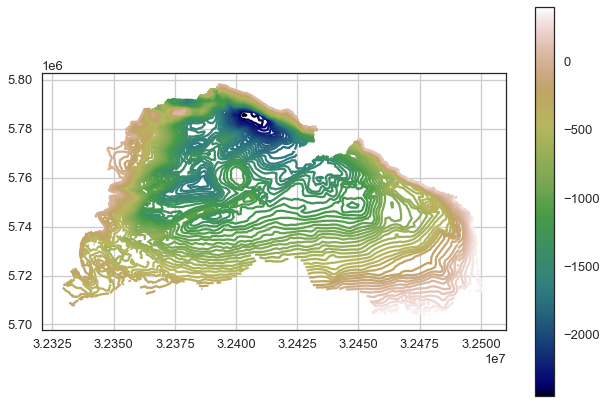

In [3]:
import matplotlib.pyplot as plt

gdf.plot(aspect='equal', column = 'Z', cmap = 'gist_earth', legend=True)
plt.grid()

## Create Mesh using Delaunay Triangulation

A PyVista PolyData object can be created using ``create_delaunay_mesh_from_gdf(..)``. 

In [4]:
mesh = gg.visualization.create_delaunay_mesh_from_gdf(gdf=gdf)
mesh

PolyData (0x280cc497a00)
  N Cells:	45651
  N Points:	23009
  X Bounds:	3.233e+07, 3.250e+07
  Y Bounds:	5.702e+06, 5.798e+06
  Z Bounds:	-2.450e+03, 4.000e+02
  N Arrays:	1

## Plotting the mesh

The created PolyData object can be plotted using PyVista.

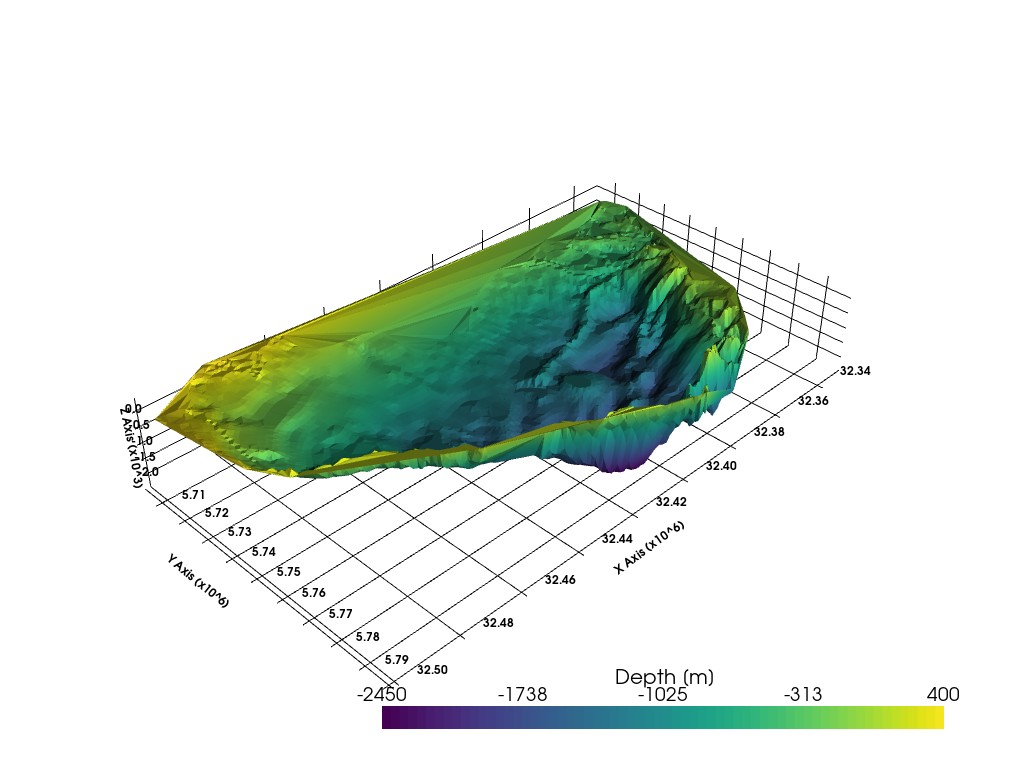

In [5]:
import pyvista as pv

sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh, scalars='Depth [m]', scalar_bar_args=sargs,)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()